# ニューラルネットワーク

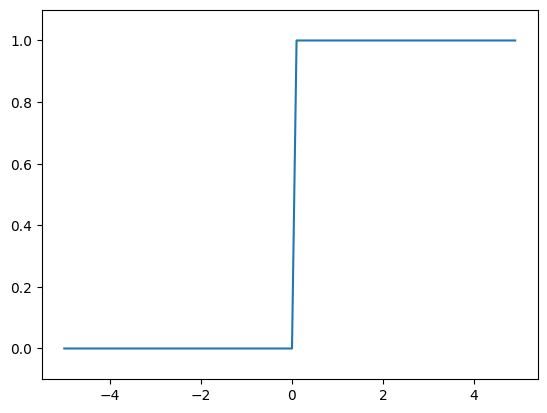

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
    return np.array(x > 0,dtype=int)

x = np.arange(-5.0,5.0,0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()


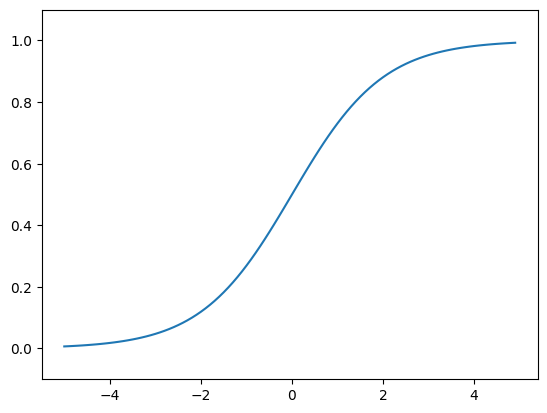

In [17]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0,5.0,0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

In [18]:
#Relu関数
def relu(x):
    return np.maximum(0,x)

In [20]:
#式3.9の実装
X = np.array([1.0,0.5])
w1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])

print(w1.shape)
print(X.shape)
print(B1.shape)


(2, 3)
(2,)
(3,)


In [22]:
A1 = np.dot(X,w1) + B1

In [23]:
Z1 = sigmoid(A1)
print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [24]:
#第一層から第二層目までの実装
w2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2 = np.array([0.1,0.2])
A2 = np.dot(Z1,w2) + B2
Z2 = sigmoid(A2)
print(Z2)

[0.62624937 0.7710107 ]


In [25]:
#第二層目から出力層への信号伝達
def identity_funcrion(x):
    return x
w3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1,0.2])

A3 = np.dot(Z2,w3) + B3
Y = identity_funcrion(A3)#出力の活性化関数に恒等関数を使用

In [26]:
#ソフトマックス関数の実装
a = np.array([0.3,2.9,4.0])
exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [27]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [28]:
#オーバーフロー対策
a = np.array([1010,1000,990])
np.exp(a) / np.sum(np.exp(a))


/tmp/ipykernel_45418/3248545720.py:3: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a))
/tmp/ipykernel_45418/3248545720.py:3: RuntimeWarning: invalid value encountered in divide
  np.exp(a) / np.sum(np.exp(a))


array([nan, nan, nan])

In [29]:
c = np.max(a)
a - c

np.exp(a - c) / np.sum(np.exp(a - c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [30]:
#オーバーフロー対策済みソフトマックス関数
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [31]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

In [32]:
(x_train,t_train),(x_test,t_test) = load_mnist(flatten=True, normalize = False)

In [33]:
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [34]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train,t_train),(x_test,t_test) = load_mnist(flatten=True,normalize=False)

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28,28)
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


Try running the update-desktop-database command. If you
don't have this command you should install the
desktop-file-utils package. This package is available from
http://freedesktop.org/wiki/Software/desktop-file-utils/
No applications found for mimetype: image/png
./usr/bin/xdg-open: 882: x-www-browser: not found
/usr/bin/xdg-open: 882: firefox: not found
/usr/bin/xdg-open: 882: iceweasel: not found
/usr/bin/xdg-open: 882: seamonkey: not found
/usr/bin/xdg-open: 882: mozilla: not found
/usr/bin/xdg-open: 882: epiphany: not found
/usr/bin/xdg-open: 882: konqueror: not found
/usr/bin/xdg-open: 882: chromium: not found
/usr/bin/xdg-open: 882: chromium-browser: not found


/usr/bin/xdg-open: 882: google-chrome: not found


/usr/bin/xdg-open: 882: www-browser: not found
/usr/bin/xdg-open: 882: links2: not found
/usr/bin/xdg-open: 882: elinks: not found


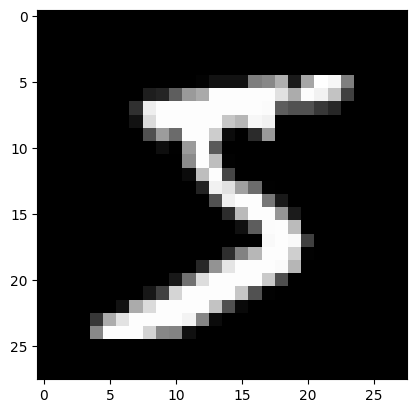

/usr/bin/xdg-open: 882: links: not found
/usr/bin/xdg-open: 882: lynx: not found
/usr/bin/xdg-open: 882: w3m: not found
xdg-open: no method available for opening '/tmp/tmpsmt4xiol.PNG'


In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img,cmap="gray")
plt.show()

In [36]:
t_train

array([5, 0, 4, ..., 5, 6, 8], shape=(60000,), dtype=uint8)

### MNISTに対して推論処理を行うニューラルネットワークの実装

In [37]:
import pickle

In [38]:
def get_data():
    (x_train,t_train),(x_test,t_test) = load_mnist(normalize=True,flatten=True,one_hot_label=False)
    return x_test,t_test

def init_network():
    with open("../ch03/sample_weight.pkl","rb") as f:
        network = pickle.load(f)

    return network

def predict(network,x):
    W1,W2,W3 = network["W1"],network["W2"],network["W3"]
    b1,b2,b3 = network["b1"],network["b2"],network["b3"]

    a1 = np.dot(x,W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3) + b3
    y = softmax(a3)

    return y

In [39]:
x,t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network,x[i])
    p = np.argmax(y)

    if p == t[i]:
        accuracy_cnt += 1
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))


Accuracy:0.9352


In [40]:
network

{'b2': array([-0.01471108, -0.07215131, -0.00155692,  0.12199665,  0.11603302,
        -0.00754946,  0.04085451, -0.08496164,  0.02898045,  0.0199724 ,
         0.19770803,  0.04365116, -0.06518728, -0.05226324,  0.0113163 ,
         0.03049979,  0.04060355,  0.0695399 , -0.07778469,  0.0692313 ,
        -0.09365533,  0.0548001 , -0.03843745,  0.02123107,  0.03793406,
        -0.02806267, -0.01818407,  0.06870425,  0.0542943 ,  0.0674368 ,
         0.06264312, -0.0233236 , -0.01589135,  0.01860516,  0.01839287,
        -0.01568104, -0.07422207, -0.01606729, -0.02262172, -0.01007509,
         0.0434415 , -0.12020151,  0.02802471, -0.07591944, -0.00533499,
        -0.08935217, -0.0181419 ,  0.0330689 , -0.01812706, -0.07689384,
        -0.02715412, -0.03847084, -0.05315471, -0.02153288,  0.06898243,
         0.02431128, -0.00333816,  0.00817491,  0.03911701, -0.02924617,
         0.07184725, -0.00356748,  0.02246175,  0.03987982, -0.04921926,
         0.02454282,  0.05875788,  0.08505439

In [44]:
print(network["W1"].shape)
print(network["W2"].shape)
print(network["W3"].shape)

(784, 50)
(50, 100)
(100, 10)


In [45]:
#バッチ処理
x,t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network,x_batch)
    p = np.argmax(y_batch,axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))


Accuracy:0.9352


# 2周目

In [2]:
import numpy as np

In [4]:
X = np.array([1.0,0.5])
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])

A1 = np.dot(X,W1) + B1

In [5]:
#シグモイド関数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [6]:
Z1 = sigmoid(A1)
print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [9]:
W2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2 = np.array([0.1,0.2])

A2 = np.dot(Z1,W2) + B2
Z2 = sigmoid(A2)

In [11]:
def identity_function(x):
    return x

W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1,0.2])

A3 = np.dot(Z2,W3) + B3
Y = identity_function(A3)


In [12]:
#実装のまとめ
def init_network():
    network = {}
    network["W1"] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network["b1"] = np.array([0.1,0.2,0.3])
    network["W2"] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network["b2"] = np.array([0.1,0.2])
    network["W3"] = np.array([[0.1,0.3],[0.2,0.4]])
    network["b3"] = np.array([0.1,0.2])

    return network

def forward(network,x):
    W1,W2,W3 = network["W1"],network["W2"],network["W3"]
    b1,b2,b3 = network["b1"],network["b2"],network["b3"]
    a1 = np.dot(x,W1) + b1
    Z1 = sigmoid(a1)
    a2 = np.dot(Z1,W2) + b2
    Z2 = sigmoid(a2)
    a3 = np.dot(Z2,W3) + b3
    y = identity_function(a3)

    return Y

network = init_network()
x = np.array([1.0,0.5])
y = forward(network,x)
print(y)


    
    

[0.31682708 0.69627909]


In [14]:
#softmax関数
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) #オ－バーフロー対策
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y



In [16]:
#MNISTデータセットの読み込み
import sys,os
sys.path.append(os.pardir)
from mnist import load_mnist

(x_train,t_train),(x_test,t_test) = load_mnist(flatten=True,normalize=False)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [17]:
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(x_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000, 784)


In [18]:
import pickle

In [23]:
#ニューラルネットワークの推論処理
def get_data():
    (x_train,t_train),(x_test,t_test) = load_mnist(normalize=True,flatten=True,one_hot_label=False)
    return x_test,t_test

def init_network():
    with open("/home/haruk/workspace/Deep-learning/deep-learning-from-scratch/ch03/sample_weight.pkl","rb") as f:
        network = pickle.load(f)

    return network

def predict(network,x):
    W1,W2,W3 = network["W1"],network["W2"],network["W3"]
    b1,b2,b3 = network["b1"],network["b2"],network["b3"]
    a1 = np.dot(x,W1) + b1
    Z1 = sigmoid(a1)
    a2 = np.dot(Z1,W2) + b2
    Z2 = sigmoid(a2)
    a3 = np.dot(Z2,W3) + b3
    y = softmax(a3)

    return y


In [24]:
x,t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network,x[i])
    p = np.argmax(y)

    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [25]:
#バッチ処理
x,t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0,len(x),batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network,x_batch)
    p = np.argmax(y_batch,axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352
